In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
import skimage
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

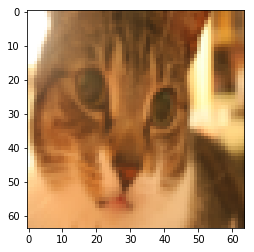

In [3]:
# Example of a picture
index = 200
example = train_set_x_orig[index]
plt.imshow(train_set_x_orig[index])


In [4]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[2]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [5]:
# Reshape the training and test examples

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

In [6]:
#standardise
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [7]:
def sigmoid(z):
    s = 1./(1 + np.exp(-z))
    return s

In [8]:
def initialize_with_zeros(dim):
    
    w = np.zeros(shape=(dim, 1), dtype=np.float32)
    b = 0
    
    assert(w.shape == (dim,1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w,b
    

In [9]:
def propagate(w,b,X,Y):
    #Front propogation
    m = X.shape[1]
    A = sigmoid(np.dot((w.T),X) + b)
    cost = (-1/m)*np.sum((Y*np.log(A) + (1-Y)*np.log(1-A)) , axis=1)
    
    #Back propogation
    dw = (1/m)*(np.dot(X,((A-Y).T)))
    db = (1/m)*(np.sum((A-Y),axis=1))
                
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape==())
    
    grads = {"dw":dw  , "db":db}
    
    return grads,cost    

In [10]:
def optimize(w,b,X,Y,learning_rate, num_iterations, print_cost = False):
    costs= []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w=w, b=b, X=X, Y=Y)
        
        ;'
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            
         # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db} 
    
    return params,grads,costs

In [11]:
def predict(w,b,X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    [print(x) for x in A]
    
    for i in range(A.shape[1]):
        if A[0, i] >= 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
            
    assert(Y_prediction.shape == (1, m))
    return Y_prediction
    

In [16]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.5,num_iterations = 2000,print_cost = False):
    
    w, b = initialize_with_zeros(X_train.shape[0])
    
# Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, learning_rate, num_iterations, print_cost)
   
# Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
# Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
# Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
   
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d 

In [17]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000 , learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
[0.94366988 0.86095311 0.88896715 0.93630641 0.74075403 0.52849619
 0.03094677 0.85707681 0.88457925 0.67279696 0.26601085 0.4823794
 0.74741157 0.78575729 0.00978911 0.9203284  0.02453695 0.84884703
 0.2050248  0.03703224 0.92931392 0.11930532 0.01411064 0.7832698
 0.58188015 0.66897565 0.7